In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
import time
df=pd.read_csv('C:/Users/samet/Desktop/GlobalLandTemperaturesByCity.csv' )
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [2]:
df1= df.dropna().copy()
df1.rename(columns={'dt':'Date'},inplace=True)
df1['Date']=pd.to_datetime(df1['Date'])
df1.set_index('Date',inplace=True)
df1.index


DatetimeIndex(['1743-11-01', '1744-04-01', '1744-05-01', '1744-06-01',
               '1744-07-01', '1744-09-01', '1744-10-01', '1744-11-01',
               '1744-12-01', '1745-01-01',
               ...
               '2012-11-01', '2012-12-01', '2013-01-01', '2013-02-01',
               '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01',
               '2013-07-01', '2013-08-01'],
              dtype='datetime64[ns]', name='Date', length=8235082, freq=None)

In [3]:
df1.describe()
pd.set_option('float_format', '{:f}'.format)
df1['Year']= df1.index.year
df1.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year
Date,,,,,,,
1743-11-01,6.068000,1.737000,Århus,Denmark,57.05N,10.33E,1743
1744-04-01,5.788000,3.624000,Århus,Denmark,57.05N,10.33E,1744
1744-05-01,10.644000,1.283000,Århus,Denmark,57.05N,10.33E,1744
1744-06-01,14.051000,1.347000,Århus,Denmark,57.05N,10.33E,1744
1744-07-01,16.082000,1.396000,Århus,Denmark,57.05N,10.33E,1744


In [4]:
df= df.dropna().copy()

In [5]:
turkey_country=df[df.Country=="Turkey"]
turkey_country["Year"] = pd.DatetimeIndex(turkey_country['dt']).year



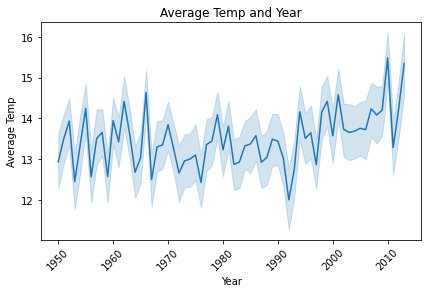

In [6]:
#Average Temperature in Turkey 1950-2013
a1950=turkey_country[turkey_country.Year>=1950]
plt.figure(figsize=(15, 4))
plt.subplot(121)
sns.lineplot(x = a1950["Year"], y = a1950["AverageTemperature"])
plt.title("Average Temp and Year")
plt.xlabel("Year")
plt.ylabel("Average Temp")
plt.xticks(rotation = 45)

plt.show()

In [7]:
Ankara=df1[df1.City=="Ankara"]
Ankara1950=Ankara[Ankara.Year>=1950]

In [8]:
from sklearn import linear_model, metrics

In [9]:
#Ankara1950's columns
Ankara1950.columns

Index(['AverageTemperature', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude', 'Year'],
      dtype='object')

In [10]:

X=Ankara1950[['Year']]
Y=Ankara1950[["AverageTemperature"]]

In [11]:
#Test size choosen, random state choosen and predict begin here.
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=100)

In [12]:
Ankara1950.shape

(764, 7)

In [13]:
lm=linear_model.LinearRegression()

In [14]:
print(X_train)
print(Y_train)

            Year
Date            
1962-12-01  1962
1962-07-01  1962
1956-07-01  1956
1950-10-01  1950
1961-11-01  1961
...          ...
1998-03-01  1998
1954-06-01  1954
1979-03-01  1979
1956-08-01  1956
1993-05-01  1993

[534 rows x 1 columns]
            AverageTemperature
Date                          
1962-12-01            4.045000
1962-07-01           22.921000
1956-07-01           21.472000
1950-10-01           10.028000
1961-11-01            7.425000
...                        ...
1998-03-01            3.154000
1954-06-01           19.740000
1979-03-01            7.357000
1956-08-01           23.072000
1993-05-01           13.693000

[534 rows x 1 columns]


In [15]:
#linear regression using here.
model= lm.fit(X_train,Y_train)

In [16]:
r_aq=lm.score(X_train,Y_train)

In [17]:
print(r_aq)

0.0018865000975872848


In [18]:
print(model.intercept_)

[-27.00817936]


In [19]:
print(model.coef_)

[[0.01918303]]


In [20]:
#Y_pred=model.predict(X_test)
Y_pred=model.intercept_ + np.sum(model.coef_ * X, axis=1)
print(Y_pred)
#Predicted values given here. Actual values are higher than that.

Date
1950-01-01   10.398720
1950-02-01   10.398720
1950-03-01   10.398720
1950-04-01   10.398720
1950-05-01   10.398720
                ...   
2013-04-01   11.607250
2013-05-01   11.607250
2013-06-01   11.607250
2013-07-01   11.607250
2013-08-01   11.607250
Length: 764, dtype: float64


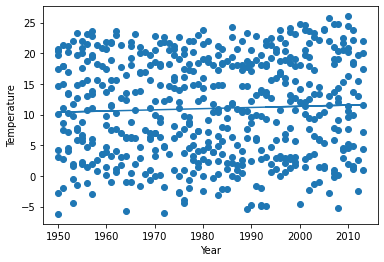

In [21]:

plt.scatter(X_train,Y_train)
plt.plot(X_train,lm.predict(X_train))
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.show()


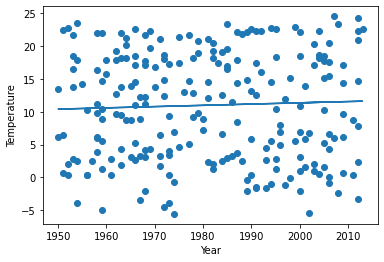

In [22]:

plt.scatter(X_test,Y_test)
plt.plot(X_test,lm.predict(X_test))
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.show()
#Reaching higher temperature values, close to the data obtained by temperature estimation,
#can also be associated with an increasing trend in temperature.